In [2]:
import wave
import matplotlib.pyplot as plt
#plt.style.use("fivethirtyeight")
import numpy as np
import scipy.signal

audio = wave.open("Filter_Design/filter_design2.wav", "rb")
signal = audio.readframes(-1)
signal = np.fromstring(signal, np.int16)
print(signal)
#plt.figure(1)
#plt.title('Signal Wave')
#plt.plot(signal)
#plt.show()
win = np.ones(len(signal))
win *= 1.0/len(signal)
filtered = scipy.signal.lfilter(win, [1], signal)
print(filtered)
print("hi")

wav_file = wave.open("test_wav.wav", "w")
wav_file.setparams((1, audio.getsampwidth(), audio.getframerate(), audio.getnchannels(), audio.getcomptype(), audio.getcompname()))
wav_file.writeframes(filtered.tobytes('C'))

audio.close()
wav_file.close()
#n = 4
#a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#print(a)
#Frequency and phase response
#signal.freqz(a)
#show()
#Impulse and step response
#figure(2)
#signal.impz(a)
#show()

[26 68 44 ..., 14  0 58]
[  2.48408751e-05   8.98093176e-05   1.31847722e-04 ...,  -2.04401574e+01
  -2.04401574e+01  -2.04401020e+01]
hi


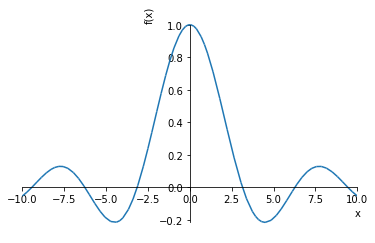

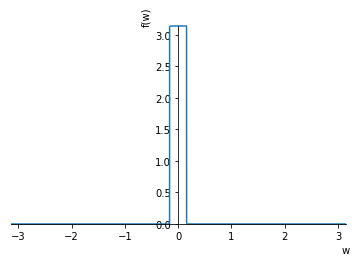

<function sinc at 0x7f31003d7c08>


In [8]:
import sympy as sym

x, w = sym.symbols('x w')

ir = sym.sinc(x)
tf = sym.fourier_transform(ir, x, w)

sym.plotting.plot(ir, (x,-10,10))
sym.plotting.plot(tf, (w,-sym.pi, sym.pi))

print np.sinc

In [11]:
import numpy as np
 
fc = 0.1  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)
 
# Compute sinc filter.
h = np.sinc(2 * fc * (n - (N - 1) / 2.))
 
# Compute Blackman window.
w = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + \
    0.08 * np.cos(4 * np.pi * n / (N - 1))
 
# Multiply sinc filter with window.
h = h * w
 
# Normalize to get unity gain.
h = h / np.sum(h)


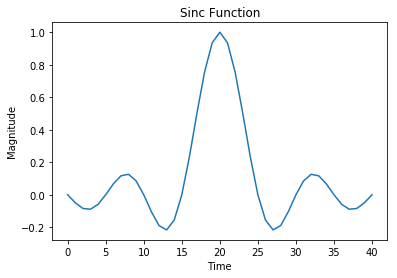

In [22]:
x = np.linspace(-4, 4, 41)
y = np.sinc(x)
plt.title('Sinc Function')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.plot(y)
plt.show()